<a href="https://colab.research.google.com/github/JinnnnyHong/Study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. 데이터 정제

##7-1. 결측치 정제

In [ ]:
#결측치 찾기
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex': ['M','F', np.nan, 'M','F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df['score'] +1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [ ]:
#결측치 확인하기
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
#결측치 빈도 확인
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [ ]:
#결측치 제거하기
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [ ]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] +1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [ ]:
#여러 변수에 결측치 없는 데이터 추출
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
# 결측치가 하나라도 있으면 제거하기
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
#평균값으로 결측치 대체하기
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14],['math']] = np.nan #2,7,14행의 math에 NaN할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam['math'].mean()

55.23529411764706

In [ ]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam['math'].isna().sum()

0

In [ ]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64, 123, 130,152, 211], "hwy"] = np.nan

In [ ]:
mpg['drv'].isna().sum()

0

In [ ]:
mpg['hwy'].isna().sum()

5

In [ ]:
mpg.dropna(subset = ['hwy'])\
.groupby('drv')\
.agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


# 7-2 이상치 정제

In [ ]:
df = pd.DataFrame({'sex': [1,2,1,3,2,1], #남자는1, 여자는 2로 했을 때, 3은 이상치임
                   'score' : [5, 4, 3, 4, 2,6]}) # 1~5점이라고 했을 때, 6은 이상치
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [ ]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [ ]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [ ]:
# 결측 처리하기
# sex가 3이면 NaN부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [ ]:
#score가 5보다 크면 NaN부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


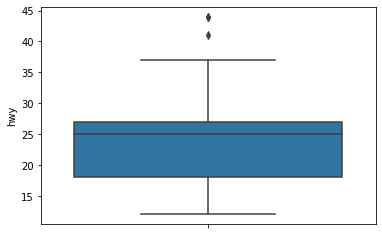

In [ ]:
#이상치 제거하기 - 극단적인 값
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [ ]:
#극단치 기준값 구하기
#1) 1,3사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [ ]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [ ]:
#2) IQR구하기
iqr = pct75 - pct25
iqr

9.0

In [ ]:
"""3) 하한, 상한 구하기
 하한: 1사분위수보다 iqr의 1.5만큼 더 작은 값
 상한: 3사분위수보다 iqr의 1.5만큼 더 큰 값 """

pct25 - 1.5 * iqr  #하한

4.5

In [ ]:
pct75 + 1.5 * iqr #상한

40.5

In [ ]:
# 극단치를 결측 처리하기
#4.5 ~40.5 벗어나면 NaN부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
mpg['hwy']

0      29.0
1      29.0
2      31.0
3      30.0
4      26.0
       ... 
229    28.0
230    29.0
231    26.0
232    26.0
233    26.0
Name: hwy, Length: 234, dtype: float64

In [ ]:
#결측치 빈도 확인
mpg['hwy'].isna().sum()

8

In [ ]:
# 결측치 제거하고 분석하기
mpg.dropna(subset = ['hwy'])\
.groupby('drv')\
.agg(mean_hwy=('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000


In [ ]:
#실습
# 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28,42,128, 202],'cty'] = [3,4,39,42]

In [ ]:
#1) drv에 이상치 있는지 확인 후 결측 처리한 다음 이상치가 사라졌는지 확인
mpg['drv'].value_counts().sort_index() #k가 이상치

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [ ]:
mpg['drv'] = np.where(mpg['drv'] == 'k', np.nan, mpg['drv']) #결측처리
mpg['drv']

0      f
1      f
2      f
3      f
4      f
      ..
229    f
230    f
231    f
232    f
233    f
Name: drv, Length: 234, dtype: object

In [ ]:
mpg['drv'].isna().sum()

4

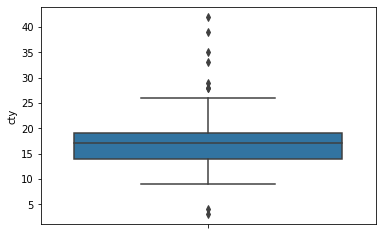

In [ ]:
# cty에 이상치 있는지 확인, 정상 범위 벗어난 값을 결측 처리한 다음 다시 상자그림 만들기
sns.boxplot(data = mpg, y = 'cty') #이상치 있는지 확인

In [ ]:
pct25 = mpg['cty'].quantile(.25) #1사분
pct75 = mpg['cty'].quantile(.75) #3사분
print(pct25, pct75)

14.0 19.0


In [ ]:
# 상한 하한 설정
iqr = pct75 - pct25
print(pct25- 1.5*iqr, pct75 + 1.5*iqr)

6.5 26.5


In [ ]:
#6.5~26.5를 벗어난 값을 결측 처리
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])
mpg['cty']

0      18.0
1       NaN
2       NaN
3       NaN
4      16.0
       ... 
229    19.0
230     NaN
231    16.0
232    18.0
233    17.0
Name: cty, Length: 234, dtype: float64

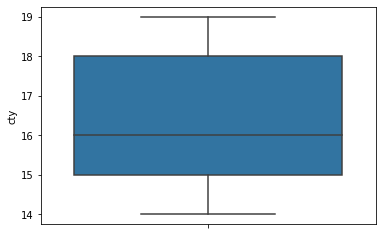

In [ ]:
sns.boxplot(data = mpg, y = 'cty')

In [ ]:
# drv별로 cty 평균이 어떻게 다른지 확인
mpg.dropna(subset = ['drv', 'cty'])\
.groupby('drv')\
.agg(cty_mean = ('cty', 'mean'))

,cty_mean
drv,
4,15.673469
f,17.618182
r,15.400000
